# **Assignment 3: Bank Marketing Data Set**

```
Nama : Diva Nabila 
Kode : PYTN-KS20-019
```

# **Project Review**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The smallest datasets are provided to test more computationally demanding machine learning algorithms. The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variabel y)

# **Import Pustaka**

In [1]:
import numpy as np
import pandas as pd 
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from dython.nominal import identify_numeric_columns, identify_nominal_columns
from dython.nominal import associations 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from joblib import dump

# **Data Loading**

Read the dataset

In [2]:
df = pd.read_csv("D:/bank-additional/bank-additional-full.csv", sep=";")

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# **Data Cleaning**

In [5]:
# Check missing values 
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
# Mengidentifikasi kolom yang termasuk data kategorik dan numerik
categorical,numeric = identify_nominal_columns(df),identify_numeric_columns(df)
for i,j in zip(["Categorical Columns","Numerical Columns"],[categorical,numeric]):
    print(f"{i}\t:{j}")

Categorical Columns	:['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numerical Columns	:['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


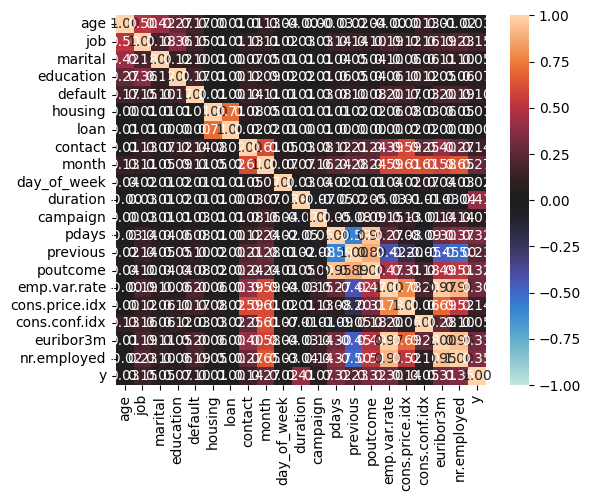

In [9]:
# Mencari korelasi keduanya
correlation = associations(df)

In [10]:
# Melihat lebih jelas nilai korelasinya
df_correlation = correlation["corr"][["y"]].iloc[:-1].sort_values("y",ascending=False)
df_correlation

,y
duration,0.405274
nr.employed,0.354678
pdays,0.324914
poutcome,0.320416
euribor3m,0.307771
emp.var.rate,0.298334
month,0.274000
previous,0.230181
job,0.151893
contact,0.144611


C:\Users\Thinkpad Yoga\AppData\Local\Temp\ipykernel_7204\3764842822.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_correlation,x=df_correlation.index,y="y",palette=["red" if i >= 0.2 else "pink" for i in df_correlation["y"]])


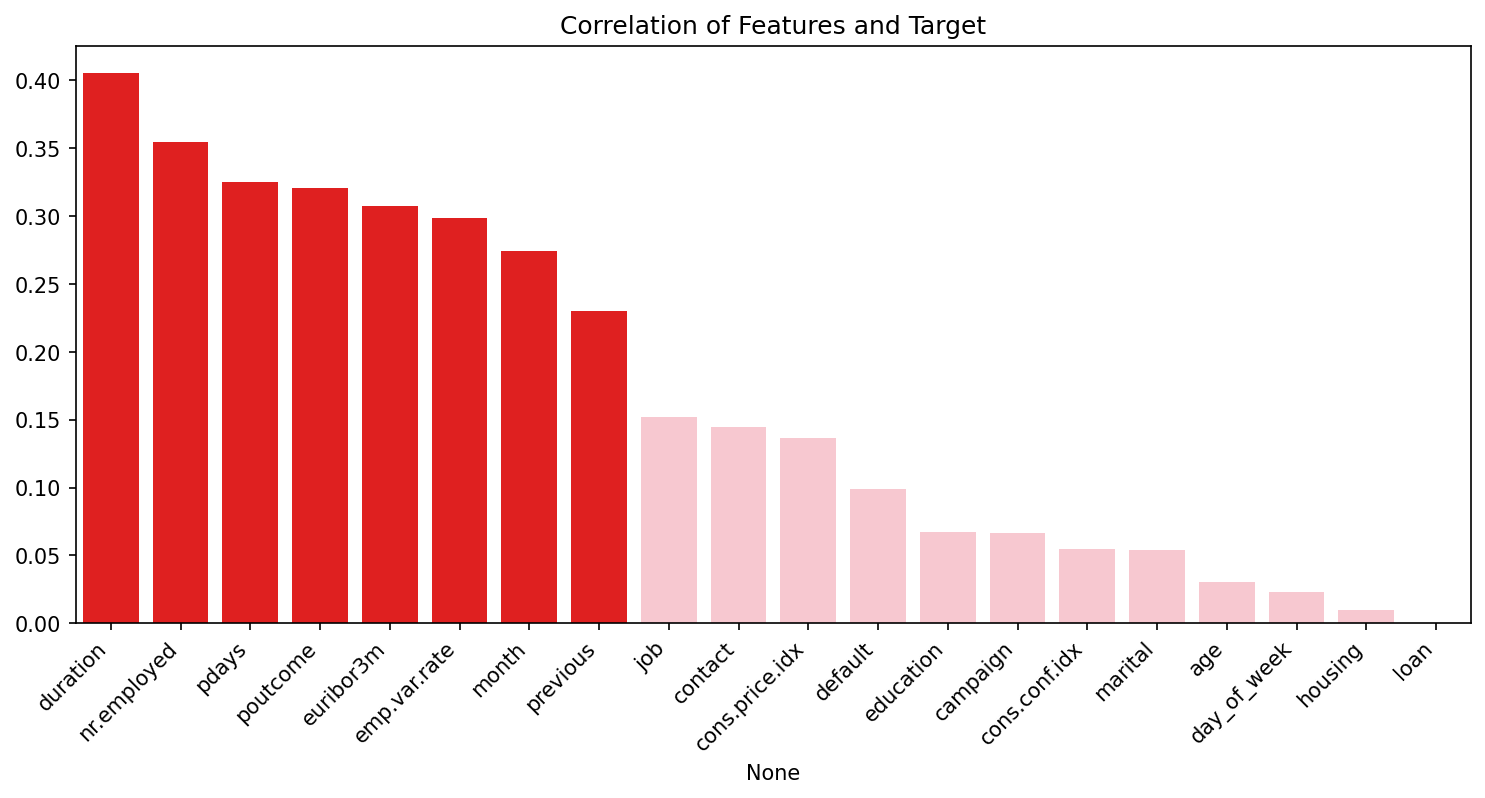

In [11]:
# Visualisasi hasil diatas
plt.figure(figsize=(12,5),dpi=150)
sns.barplot(data=df_correlation,x=df_correlation.index,y="y",palette=["red" if i >= 0.2 else "pink" for i in df_correlation["y"]])
plt.title("Correlation of Features and Target")
plt.xticks(rotation=45,ha="right")
plt.ylabel("")
plt.show()

In [12]:
# Menghapus kolom yang memiliki korelasi kecil
df = df[list(df_correlation[df_correlation["y"] >= 0.2].index)+["y"]]
df.head()

,duration,nr.employed,pdays,poutcome,euribor3m,emp.var.rate,month,previous,y
0,261,5191.0,999,nonexistent,4.857,1.1,may,0,no
1,149,5191.0,999,nonexistent,4.857,1.1,may,0,no
2,226,5191.0,999,nonexistent,4.857,1.1,may,0,no
3,151,5191.0,999,nonexistent,4.857,1.1,may,0,no
4,307,5191.0,999,nonexistent,4.857,1.1,may,0,no


# **Data Preprocessing**

In [13]:
# Mendifinsiikan variabel X dan y
LE = LabelEncoder()
X = df.drop("y",axis=1).copy().apply(LE.fit_transform)
y = df["y"].copy()

In [14]:
# Membagi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=8)

print(f"Training dataset\t: {len(X_train)}")
print(f"Testing dataset\t\t: {len(X_test)}")

Training dataset	: 28831
Testing dataset		: 12357


In [15]:
# Standarisasikan karena akan dilakukan analisis pada beberapa model
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Dilakukan standarisasi pada variabel agar variabel yang akan dianalisis menggunakan beberapa model dapat tetap, tidak akan berubah-ubah. Karena fokus kita disini adalah membandingkan mana model yang maksimal dalam memprediksi untuk dataset yang tersedia.

# **Logistic regression**

In [16]:
# Membuat model
logistic_model = LogisticRegression(class_weight="balanced",random_state=8).fit(scaled_X_train, y_train)
logistic_model

LogisticRegression(class_weight='balanced', random_state=8)

In [17]:
# Membuat prediksi dengan data testing
logistic_pred = logistic_model.predict(scaled_X_test)

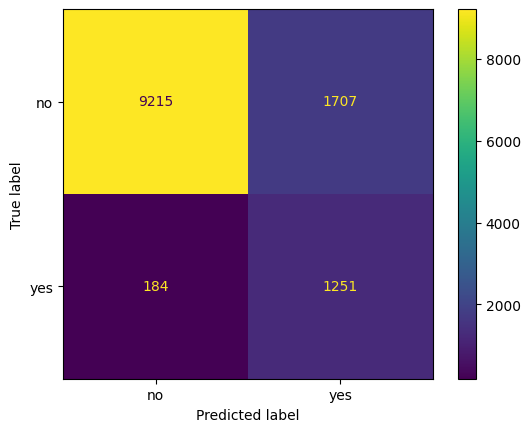

Accuracy Score:84.69693291251922%


In [18]:
# Mengevaluasi model Logistic Regression pada dataset
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,logistic_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score:{accuracy_score(y_test,logistic_pred)*100}%")

In [19]:
# Fitting untuk keseluruhan data
final_log_model = LogisticRegression(class_weight="balanced", random_state=8, max_iter=10_000).fit(X,y)
final_log_model

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=8)

In [20]:
# Nilai intercept pada masing-masing atribut
pd.DataFrame(
    data=[final_log_model.intercept_[0]] + list(final_log_model.coef_[0]),
    columns=["Unstandardized Coefficients"],
    index=["Constant"] + list(X.columns)
)

,Unstandardized Coefficients
Constant,0.414333
duration,0.006731
nr.employed,-0.253806
pdays,0.009797
poutcome,1.108494
euribor3m,-0.003433
emp.var.rate,-0.217444
month,-0.132284
previous,0.419962


In [22]:
# Model akhir
x=sp.Symbol("(x)")
beta=[]
for _ in X.columns:
    beta.append(sp.Symbol(f"({_})"))

total=np.round(final_log_model.intercept_[0],3)
for _ in range(len(X.columns)):
    total = total + (beta[_]*np.round(final_log_model.coef_[0,_],3))

sp.Eq(sp.log((sp.pi*x)/(1-(sp.pi*x))),total)

Eq(log(pi*(x)/(-pi*(x) + 1)), 0.007*(duration) - 0.217*(emp.var.rate) - 0.003*(euribor3m) - 0.132*(month) - 0.254*(nr.employed) + 0.01*(pdays) + 1.108*(poutcome) + 0.42*(previous) + 0.414)

# **K-Nearest Neighbors**

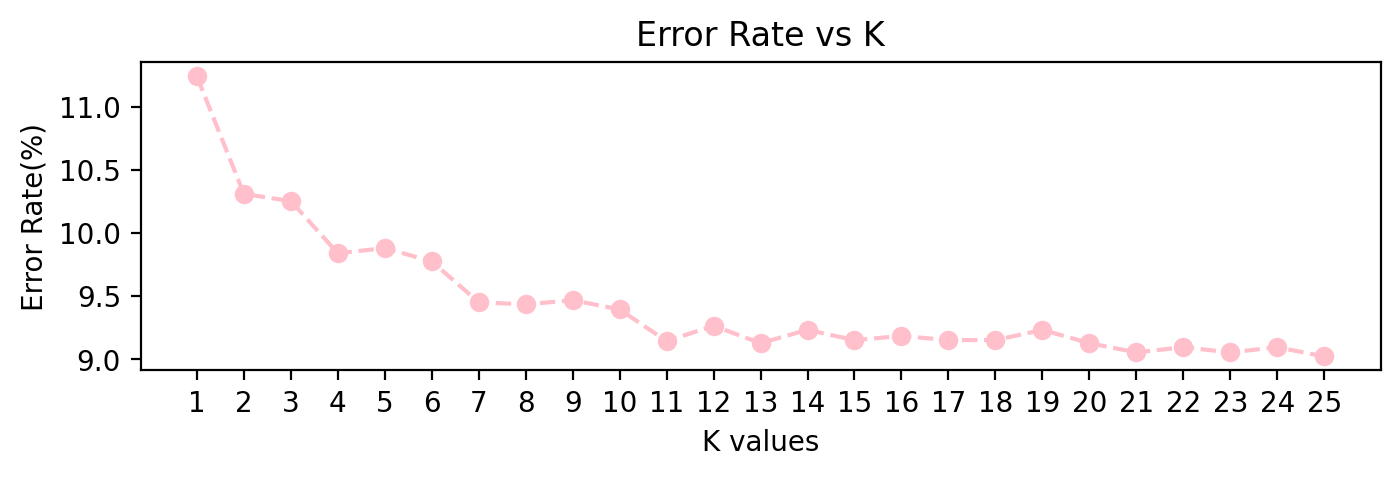

In [58]:
# Mencari nilai K yang optimal dengan melihat rating errornya
errors = []
for _ in range(1,26):
    temp_model = KNeighborsClassifier(n_neighbors=_)
    temp_model.fit(scaled_X_train,y_train)
    temp_pred = temp_model.predict(scaled_X_test)
    error = 100 - (accuracy_score(y_test,temp_pred)*100)
    errors.append(error)

plt.figure(figsize=(8,2),dpi=200)
plt.plot(range(1,26),errors,color="pink",marker="o",ls="--")
plt.title("Error Rate vs K")
plt.xlabel("K values")
plt.xticks(range(1,26))
plt.ylabel("Error Rate(%)")
plt.show()

In [57]:
# Membuat dan melatih model
k = 7
knn_model = KNeighborsClassifier(n_neighbors=k,weights="distance")
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

Setelah membuat dan melatih model, kita lakukan prediksi terhadap model KNN dengan data testing

In [25]:
# Membuat prediksi dengan data testing
knn_pred = knn_model.predict(scaled_X_test)

Setelah melakukan prediksi degan model knn, selanjutnya kita evaluasi modelnya

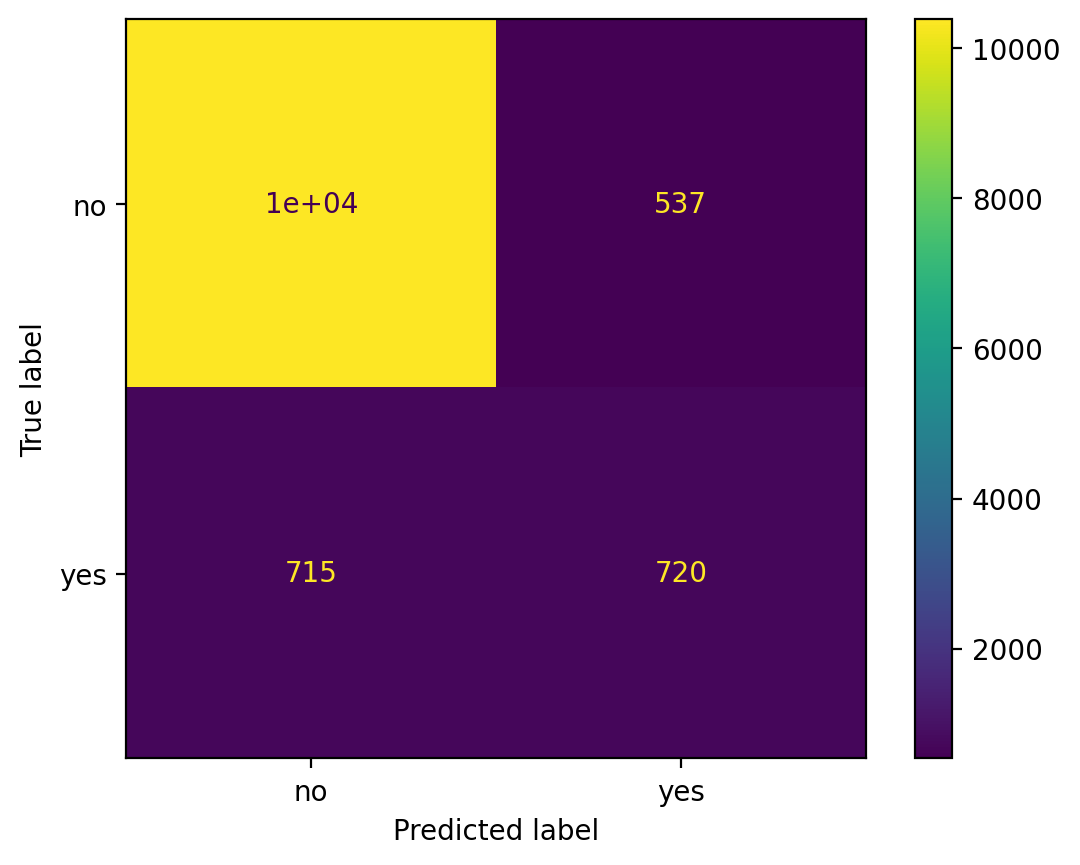

In [26]:
# Mengevaluasi model
plt.figure(dpi=200)
ConfusionMatrixDisplay.from_predictions(y_test,knn_pred,ax=plt.gca())
plt.grid(False)
plt.show()

In [27]:
# Lihat akurasi skornya
print(f"Accuracy Score: {accuracy_score(y_test,knn_pred)*100}%")

Accuracy Score: 89.86809096058914%


Skor akurasi prediksi dataset menggunakan model KNeighbors sebesar 89.868090

In [28]:
# Membuat model dengan seluruh dataset
final_knn_model = KNeighborsClassifier(n_neighbors=k,weights="distance")
final_knn_model.fit(X,y)

KNeighborsClassifier(n_neighbors=7, weights='distance')

# **SVM**

In [29]:
# Membuat model SVM
svm_model = SVC(class_weight="balanced",random_state=8)
svm_model.fit(scaled_X_train,y_train)

SVC(class_weight='balanced', random_state=8)

Setelah membuat dan melatih model, kita lakukan prediksi pada model tersebut menggunakan data testing

In [30]:
# Membuat prediksi model svm dengan data testing
svm_pred = svm_model.predict(scaled_X_test)

Setelah melakukan prediksi dengan model svm, kemudian kita evaluasi modelnya

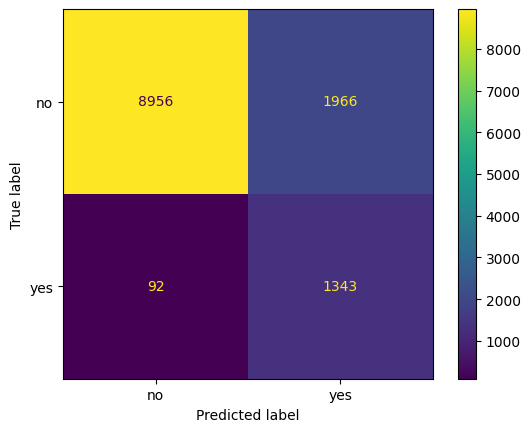

Accuracy Score: 83.34547220199077%


In [32]:
# Evaluasi model dan akurasi skornya
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,svm_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score: {accuracy_score(y_test,svm_pred)*100}%")

Skor akurasi yang didapat model SVM untuk dapat memprediksi dataset ini adalah sebesar 83.3454

In [55]:
# Membuat dan melatih model dengan seluruh data
final_svm_model = SVC(class_weight="balanced",random_state=8)
final_svm_model.fit(X,y)

SVC(class_weight='balanced', random_state=8)

# **Decision Tree**

In [53]:
# Membuat dan melatih model
dec_model = DecisionTreeClassifier(max_depth=6,class_weight="balanced",random_state=8)
dec_model.fit(scaled_X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=8)

Setelah membuat dan melatih model, langkah selanjutnya adalah memprediksikan model dengan data testing

In [35]:
# Membuat prediksi dengan data testing
dec_pred = dec_model.predict(scaled_X_test)

Setelah melakukan prediksi pada model, kemudian kita coba lakukan evaluasi

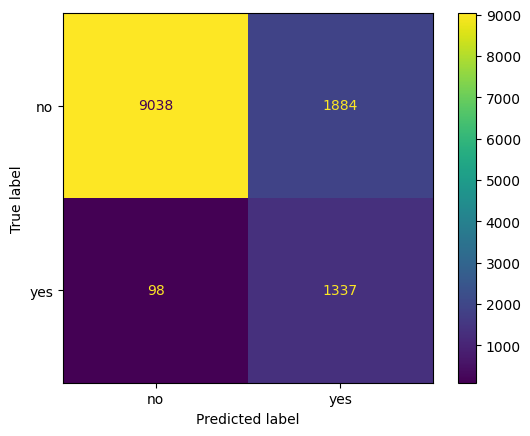

Accuracy Score: 83.96050821396778%


In [36]:
# Evaluasi model dan lihat skor akurasinya
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,dec_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score: {accuracy_score(y_test,dec_pred)*100}%")

Skor akurasi yang didapat model Decision Tree untuk dapat memprediksi dataset sebesar 83.960

In [54]:
# Membuat model dan melatih model dengan keseluruhan data
final_dec_model = DecisionTreeClassifier(max_depth=5, class_weight="balanced",random_state=8)
final_dec_model.fit(X,y)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=8)

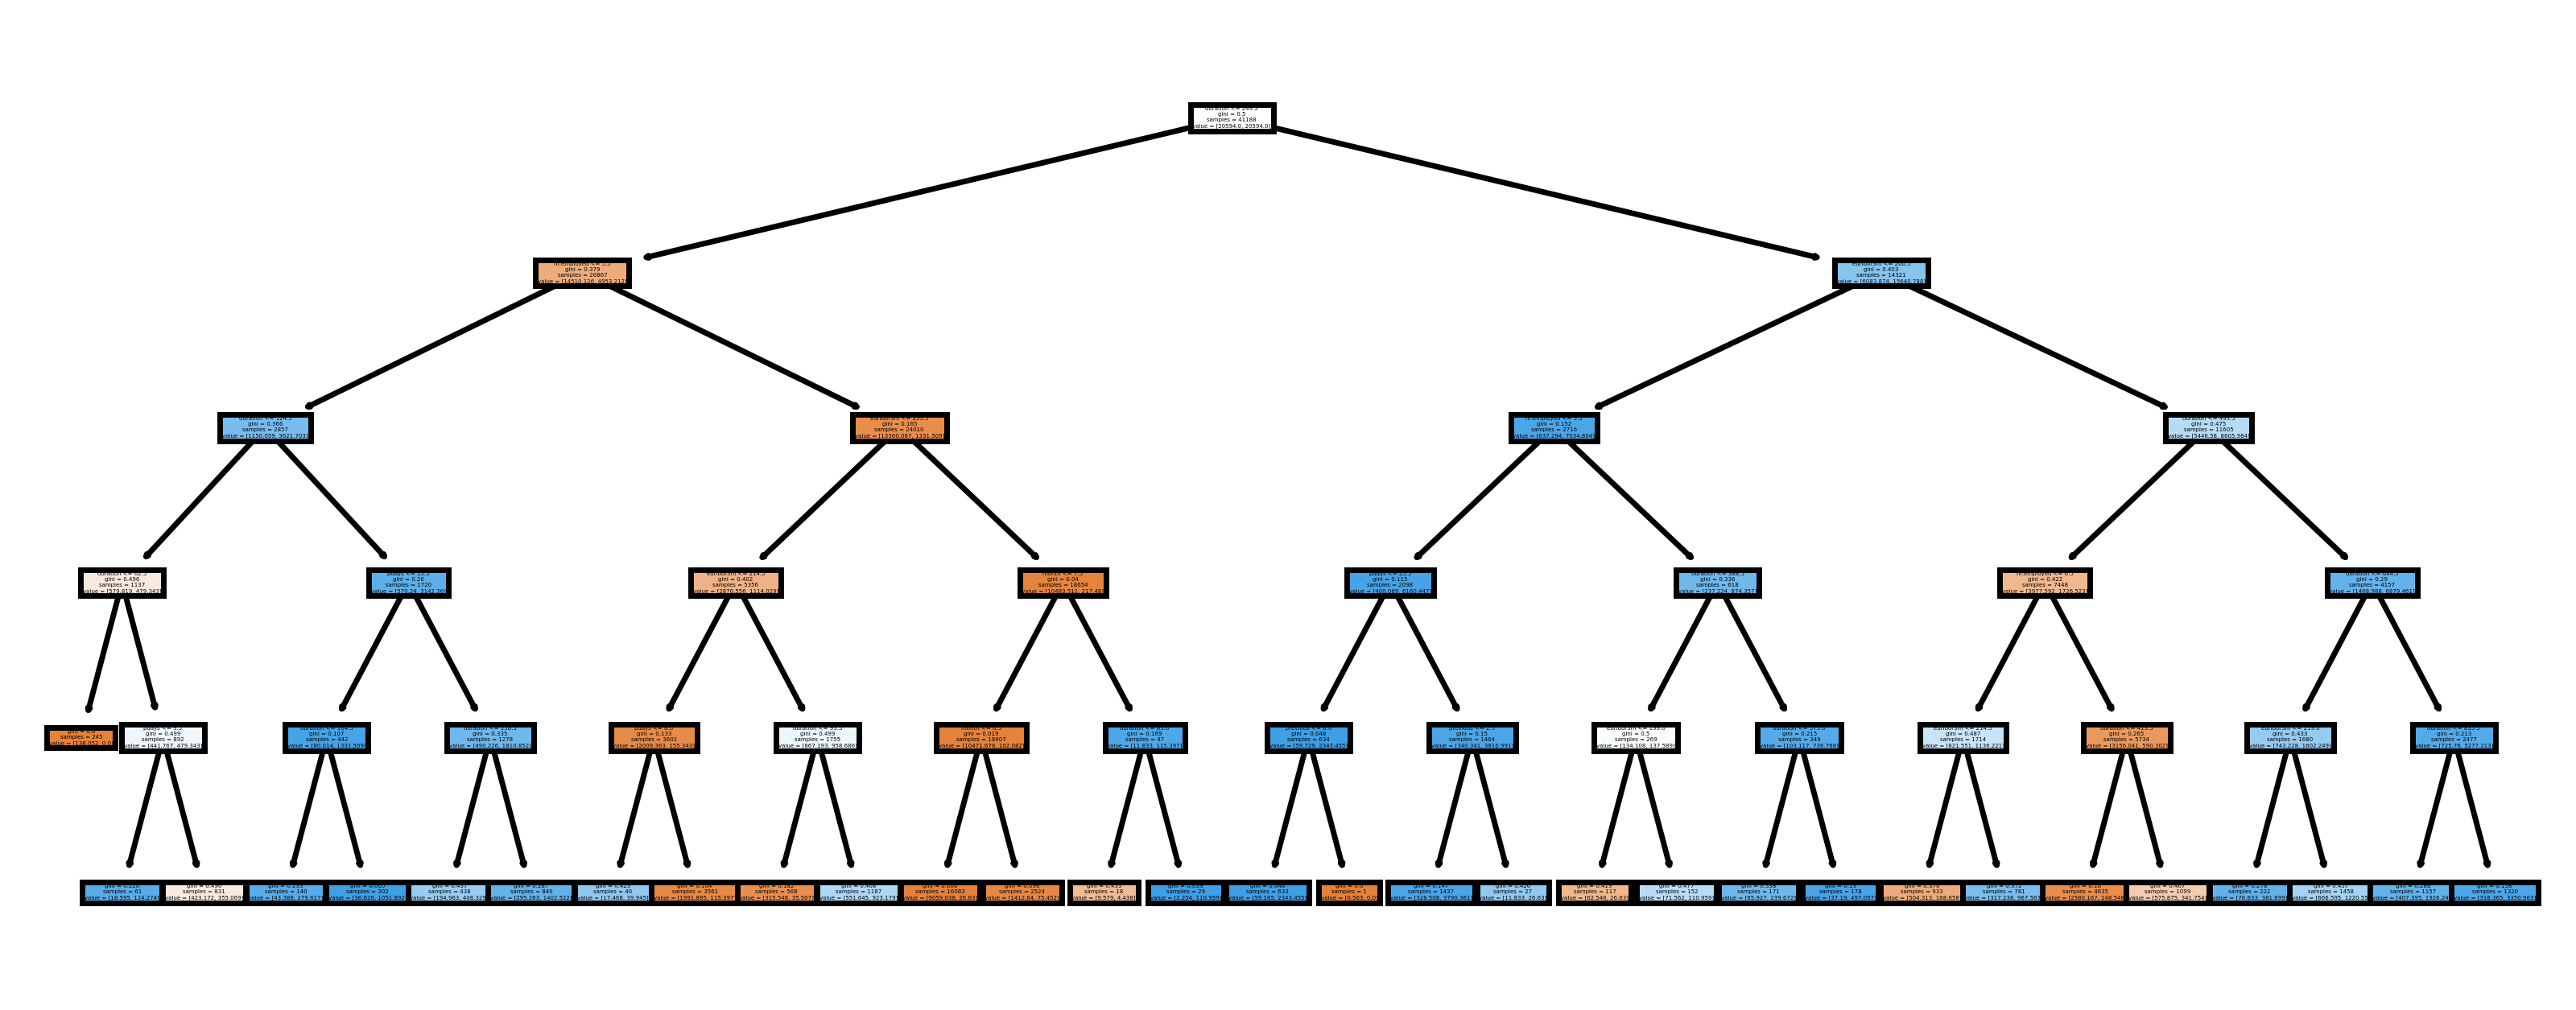

In [38]:
# Memvisualisasikan hasil dt
plt.figure(figsize=(8,3),dpi=500)
plot_tree(final_dec_model,filled=True,feature_names=X.columns)
plt.show()

# **Random Forest**

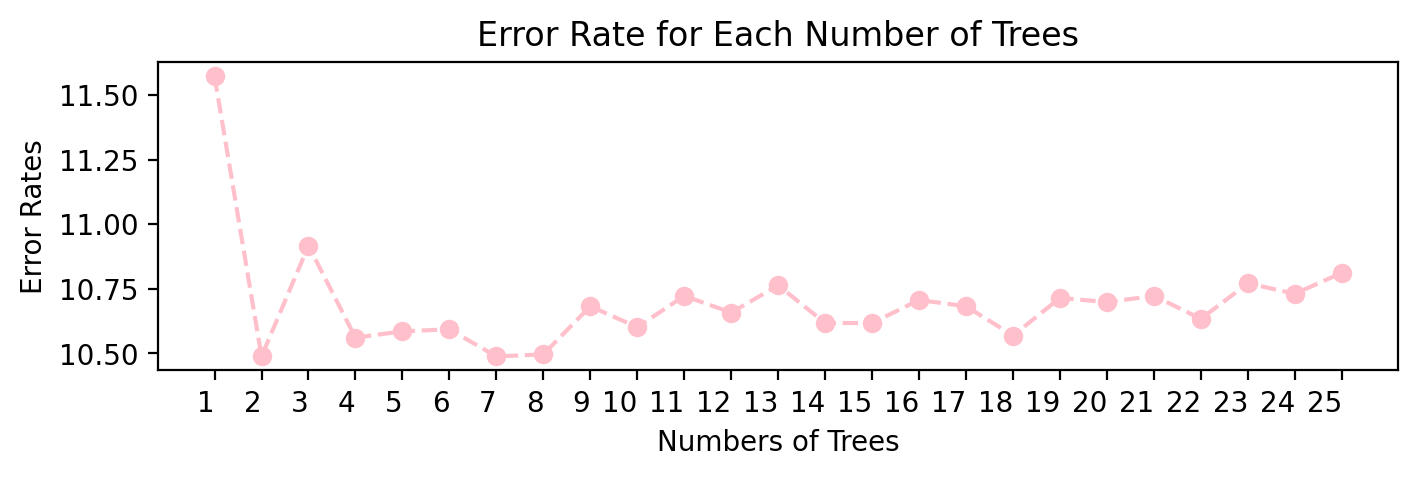

In [39]:
# Menghitung dan memvisualisasikan error rates for each number of trees
errors = []
for i in range(1,26):
    model = RandomForestClassifier(n_estimators=i, class_weight="balanced", random_state=8)
    model.fit(scaled_X_train,y_train)
    pred = model.predict(scaled_X_test)
    error = 100 - (accuracy_score(y_test,pred)*100)
    errors.append(error)

plt.figure(figsize=(8,2),dpi=200)
plt.plot(range(1,26),errors,color="pink",marker="o",ls="--")
plt.title("Error Rate for Each Number of Trees")
plt.xlabel("Numbers of Trees")
plt.xticks(range(1,26),ha="right")
plt.ylabel("Error Rates")
plt.show()

In [40]:
# Membuat dan melatih model dengan n=6
n = 6
random_model = RandomForestClassifier(n_estimators=n,class_weight="balanced",random_state=8)
random_model.fit(scaled_X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=6, random_state=8)

Setelah membuat dan melatih model, kita lakukan prediksi terhadap model tersebut menggunakan data testing

In [41]:
# Membuat prediksi dengan data testing
random_pred = random_model.predict(scaled_X_test)

Setelah melakukan prediksi pada model, kita lakukan evaluasi model

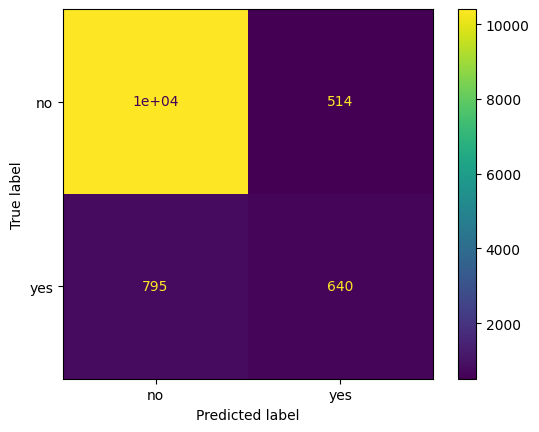

Accuracy Score: 89.40681395160638%


In [42]:
# Evaluasi model dan lihat skor akurasinya
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,random_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score: {accuracy_score(y_test,random_pred)*100}%")

Skor akurasi yang didapat model Random Forest untuk dapat memprediksikan dataset yang akan datang sebesar 89.40681

In [43]:
# Melakukan pemodelan untuk seluruh data
final_random_model = RandomForestClassifier(n_estimators=n,class_weight="balanced",random_state=8)
final_random_model.fit(X,y)

RandomForestClassifier(class_weight='balanced', n_estimators=6, random_state=8)

# **Naive bayes** 

In [44]:
# membuat model dan melatih model
naive_model = BernoulliNB()
naive_model.fit(scaled_X_train,y_train)

BernoulliNB()

Setelah kita membuat dan melatih model, selanjutnya kita prediksi model tersebut menggunakan data testing

In [45]:
# Membuat prediksi
naive_pred = naive_model.predict(scaled_X_test)

Setelah memprediksikan model, selanjutnya kita lakukan evaluasi model

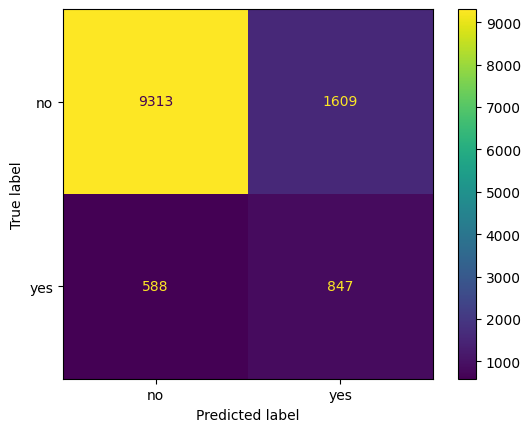

Accuracy Score: 82.22060370640123%


In [46]:
# Evaluasi model
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,naive_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score: {accuracy_score(y_test,naive_pred)*100}%")

Skor akurasi yang didapat untuk model Naive Bayes adalah 82.2206

In [47]:
# Memodelkan dan melatih dengan data secara keseluruhan
final_naive_model = BernoulliNB()
final_naive_model.fit(X,y)

BernoulliNB()

Berdasarkan analisis di atas, ditemukan bahwa K near neighbors dan random forest model memiliki nilai akurasi yang tinggi hampir 90%. Namun, prediksi kedua model tidak akurat dan tidak seimbang, sehingga tidak direkomendasikan pada data ini. Jadi model yang direkomendasikan untuk dataset ini adalah regresi logistik karena memiliki nilai akurasi yang tinggi setelah dibandingkan dengan model lain yaitu 84,017% dan model ini merupakan model terbaik untuk dataset ini. 

In [48]:
# Membuat variabel preds dengan model yang akan dibandingkan
preds = [logistic_pred,svm_pred,dec_pred,naive_pred]
models = ["Logistic Regression","Support Vector Machine","Decision Tree","Naive Bayes"]
accuracy_scores = [accuracy_score(y_test,i)*100 for i in preds]

comparison = pd.DataFrame(
    data=accuracy_scores,columns=["Accuracy Scores"],index=models
).sort_values("Accuracy Scores", ascending=False)

C:\Users\Thinkpad Yoga\AppData\Local\Temp\ipykernel_7204\1611025663.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


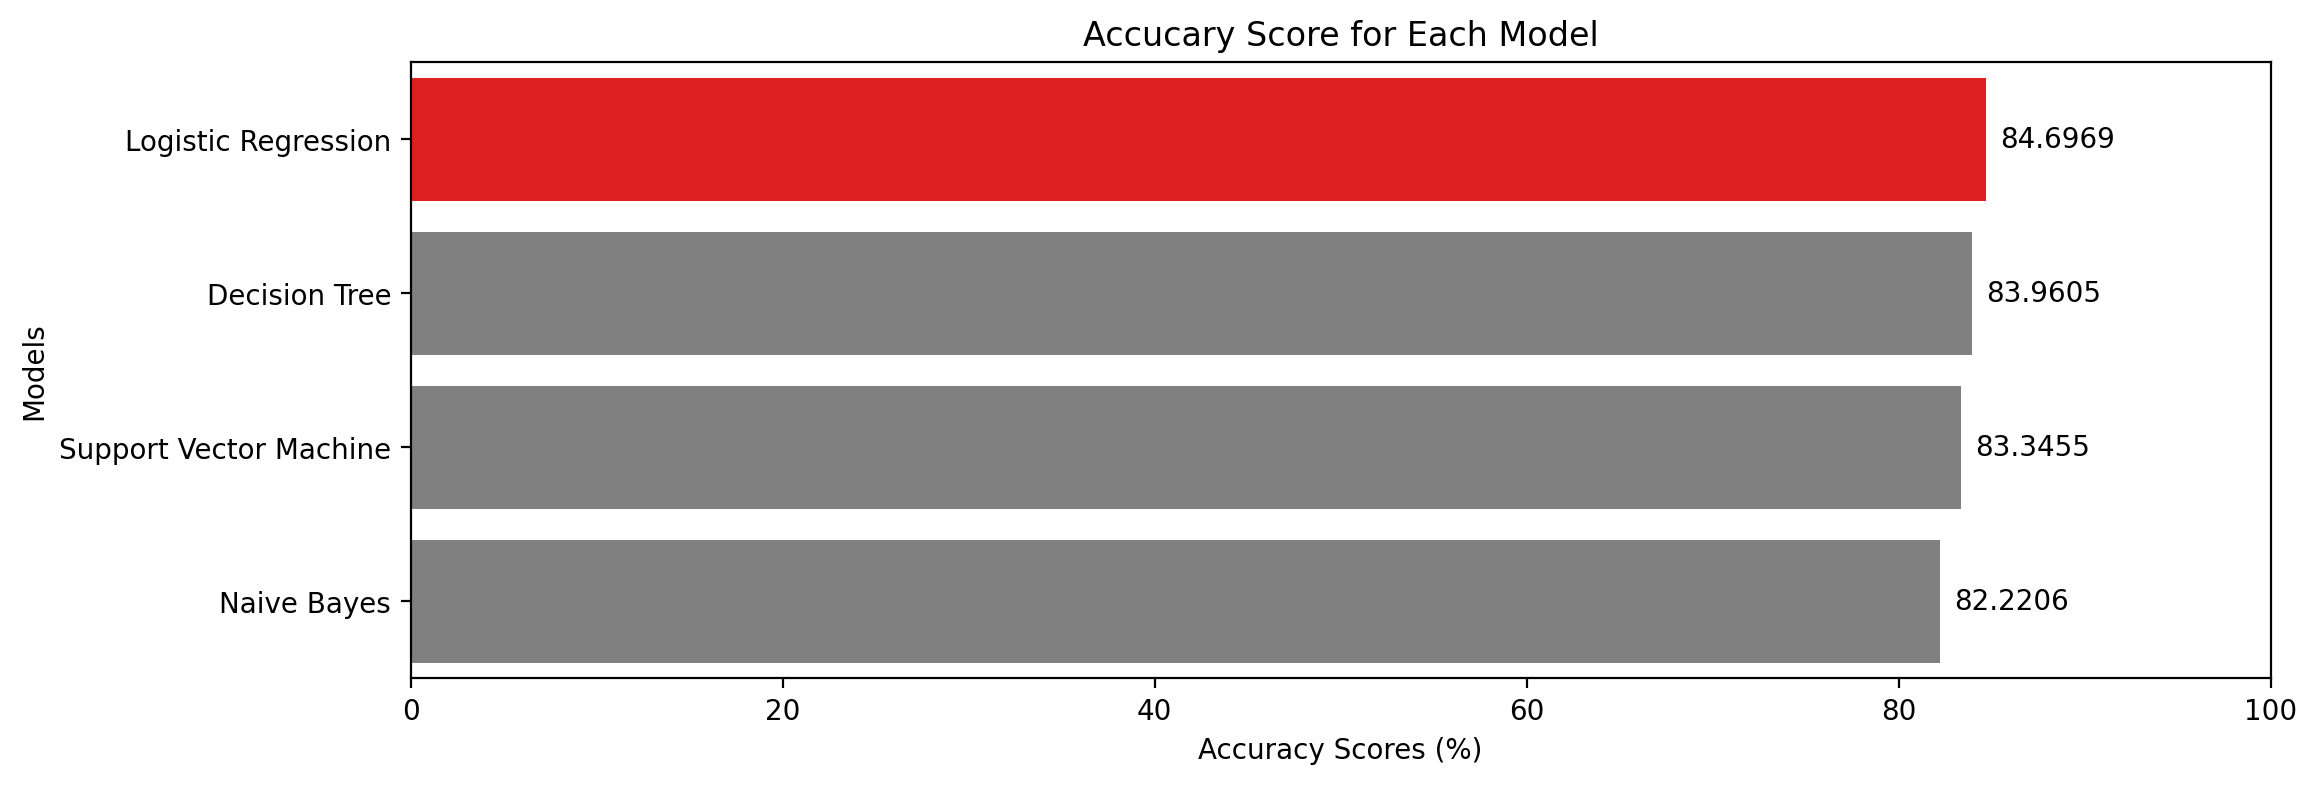

In [49]:
# Membuat bar plot untuk melihat model algoritma yang memiliki skor akurasi paling tinggi
plt.figure(figsize=(12,4),dpi=200)
barplot = sns.barplot(
    data=comparison,
    x="Accuracy Scores",
    y=comparison.index,
    orient="h",
    palette=["red" if i == comparison.head(1).iloc[0,0] else "grey" for i in comparison["Accuracy Scores"]]
)
for bars in barplot.containers:
    barplot.bar_label(bars,padding=5)
plt.title("Accucary Score for Each Model")
plt.xlabel("Accuracy Scores (%)")
plt.ylabel("Models")
plt.xlim(xmax=100)
plt.show()

In [51]:
# Membandingkan hasil prediksi setiap model dengan data aktualnya
pd.DataFrame(data=np.stack(preds,axis=1),columns=models,index=y_test.values).rename_axis(index="Actual Values")

,Logistic Regression,Support Vector Machine,Decision Tree,Naive Bayes
Actual Values,,,,
no,no,no,no,no
no,yes,no,no,yes
no,no,no,no,no
no,no,no,no,no
yes,yes,yes,yes,no
...,...,...,...,...
no,yes,no,yes,yes
yes,no,yes,no,no
yes,yes,no,yes,yes


In [52]:
# Save semua model
final_models = [final_log_model,final_knn_model,final_svm_model,
                final_dec_model,final_random_model,final_naive_model]
file_names = ["logistic_regression","knn","svm","decision_tree","random_forest","naive_bayes"]

for i,j in zip(final_models,file_names):
    dump(i,j+".joblib")
    print(f'{j}.joblib has been saved succesfully!')

logistic_regression.joblib has been saved succesfully!
knn.joblib has been saved succesfully!
svm.joblib has been saved succesfully!
decision_tree.joblib has been saved succesfully!
random_forest.joblib has been saved succesfully!
naive_bayes.joblib has been saved succesfully!


# **Conclusion**

Berdasarkan analisis yang telah dilakukan diatas, dapat kita simpulkan bahwa model algoritma yang maksimal dalam memberikan prediksi untuk dataset "BankAdditional" ini adalah Logistic Regression karena memiliki skor akurasi 84.6969 yang mana skor tersebut merupakan skor paling tinggi diantara model yang lain. Selain itu, hal yang dapat silihat lagi adalah perbandingan hasil prediksi diatas, pada model Logistic Regression memberikan prediksi hampir semuanya sama dengan data aktualnya. Maka dari itu dapat dikatakan bahwa `model algortima yang cocok untuk dataset atau kasus ini adalah Logistic Regression`